In [ ]:
# for mathematical calculations
import numpy as np

# to visualize the data and results
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# to build the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, r2_score
from sklearn.model_selection import train_test_split , cross_val_score, RandomizedSearchCV


# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data  = pd.read_csv("/content/drive/MyDrive/Final Project/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#For model checking

data[20:31]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
20,3,126,88,41,235,39.3,0.704,27,0
21,8,99,84,0,0,35.4,0.388,50,0
22,7,196,90,0,0,39.8,0.451,41,1
23,9,119,80,35,0,29.0,0.263,29,1
24,11,143,94,33,146,36.6,0.254,51,1
25,10,125,70,26,115,31.1,0.205,41,1
26,7,147,76,0,0,39.4,0.257,43,1
27,1,97,66,15,140,23.2,0.487,22,0
28,13,145,82,19,110,22.2,0.245,57,0
29,5,117,92,0,0,34.1,0.337,38,0


In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print(data.select_dtypes(include=['float64','int64']).columns) #Printing the Names on all the Numerical Columns
print(len(data.select_dtypes(include=['float64','int64']).columns)) #Printing the total number of Numerical Columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
9


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(f'Total Missing Values from the whole data set are: ', data.isnull().values.sum())  # Checking the total Null Values of the whole data set 
print(f'Number of Columns with Missing Values are: ', len(data.columns[data.isnull().any()])) #No of Columns with Missing Valeus
print(f'Names of the Columns with Missing Values are: ', data.columns[data.isnull().any()]) #Checking the Name of the columns with null values

Total Missing Values from the whole data set are:  0
Number of Columns with Missing Values are:  0
Names of the Columns with Missing Values are:  Index([], dtype='object')


In [ ]:
print(f'There are ',data.isnull().values.sum(), ' Null Values is the Dataset')

There are  0  Null Values is the Dataset


In [ ]:
print(f"Unique Values in Column 'Outcome' are :", data.Outcome.unique()) #Getting all Unique Values in Column 'diagnosis'
print(f"Total Number of unique Values in Column 'Outcome' are : ",data.Outcome.nunique()) #Getting Total Number of unique Values in Column 'diagnosis'

Unique Values in Column 'Outcome' are : [1 0]
Total Number of unique Values in Column 'Outcome' are :  2


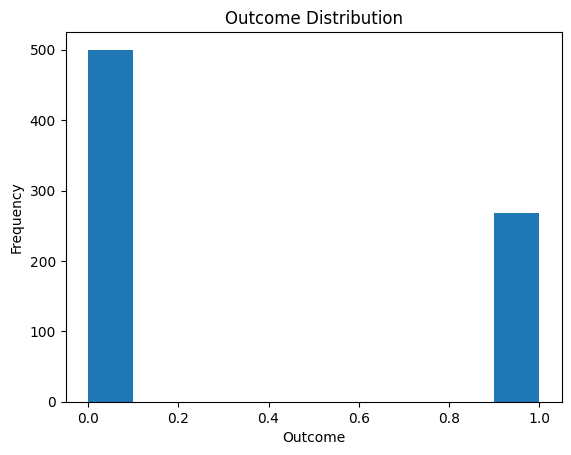

In [ ]:
plt.hist(data["Outcome"]);
plt.title("Outcome Distribution");
plt.xlabel("Outcome")
plt.ylabel("Frequency");

In [ ]:
outcome = data["Outcome"]
outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

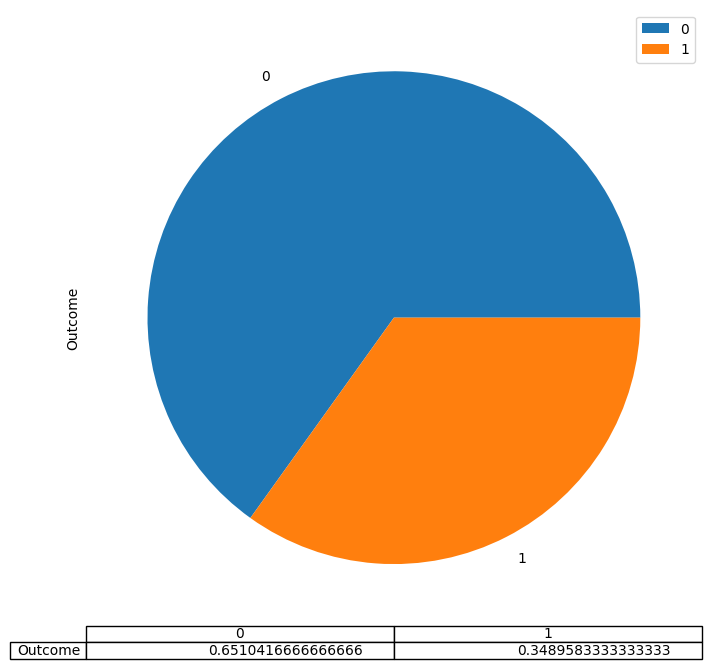

In [ ]:
data["Outcome"].value_counts(normalize=True).plot(kind="pie", legend=True, table=True, figsize=(10,8));

In [ ]:
#Creating a new variable witout the label column 'diagnosis_M'
df2 = data.drop(columns='Outcome') 
df2.head()  #Checking the dataset if the label columns is droped in the new varibale

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


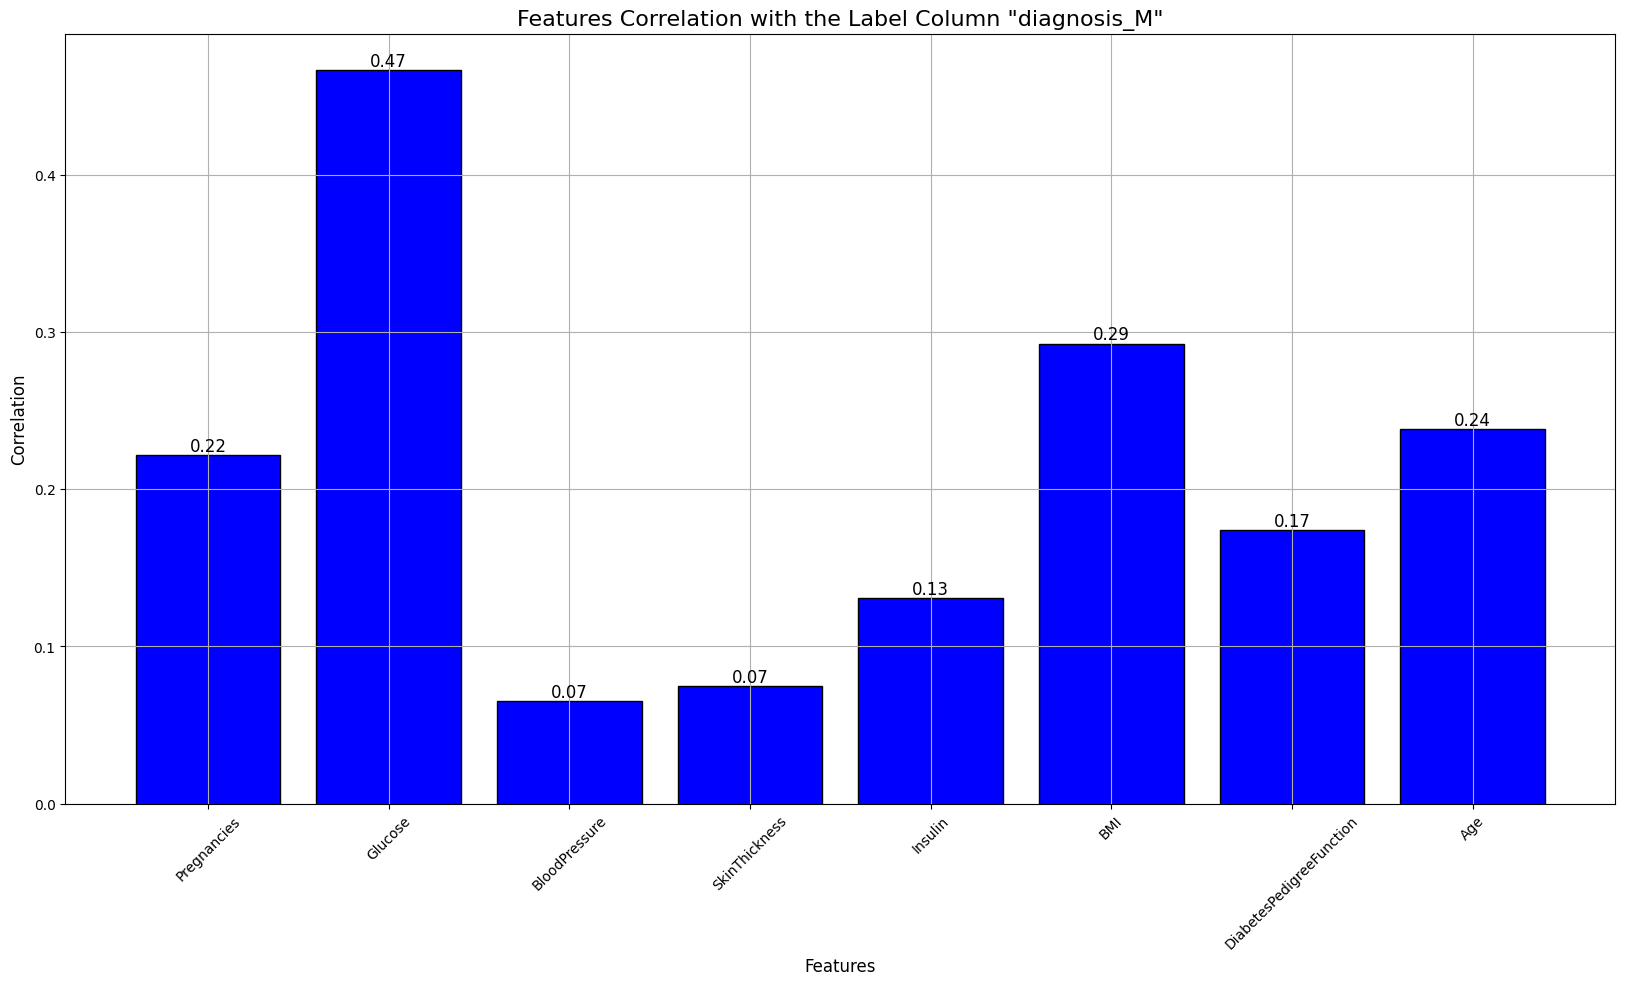

In [ ]:
# Computing the correlation between the features and the label column
corrw = df2.corrwith(data['Outcome'])

# Plotting the bar chart using matplotlib
plt.figure(figsize=(20, 10))
plt.bar(corrw.index, corrw.values, color='blue', edgecolor='black')

# Adding title, labels, and grid to the plot
plt.title('Features Correlation with the Label Column "diagnosis_M"', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Adding annotations to the bars
for i, value in enumerate(corrw.values):
    label = f"{value:.2f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=12)

# Displaying the plot
plt.show()

In [1]:
# Plotting a Heatmap to see in depth corrolation 
corr = data.corr()  #Defining a corrolation variavle (Corrolation Matrix)
plt.figure(figsize=(4,3))  

sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True)

# Adding title and labels to the plot
plt.title('Features Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

NameError: name 'data' is not defined

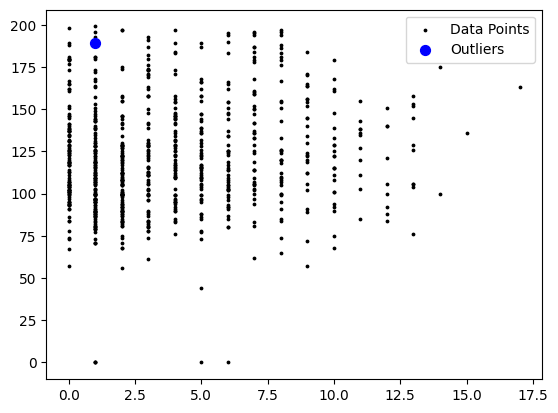

In [ ]:
# outlier detection (#Previously done "data.drop[outcome]" wont delete 'outcome' cloumn completely. )

y = data["Outcome"]
x = data.drop(["Outcome"], axis = 1)

clf = LocalOutlierFactor(n_neighbors = 20)
clf.fit_predict(x)
xScore = clf.negative_outlier_factor_

outlierScore = pd.DataFrame()
outlierScore["score"] = xScore

threshold = -2.5
filt = outlierScore["score"] < threshold
outlierIndex = outlierScore[filt].index.tolist()

radius = (xScore.max() - xScore) / (xScore.max() - xScore.min())
outlierScore["radius"] = radius

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color = 'k', s = 3, label = "Data Points")
#plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s = 1000 * radius, edgecolors = 'r', facecolors = "none", label = "Oulier Scores")
plt.scatter(x.iloc[outlierIndex, 0], x.iloc[outlierIndex, 1], color = 'b', s = 50, label = "Outliers")
plt.legend()

plt.show()

In [ ]:
# drop outliers

x = x.drop(outlierIndex)
y = y.drop(outlierIndex).values

In [ ]:
# Treating #FOutliers and Non-Normality Outliers are extreme values existing in the dataset. 
# It is necessary to treat outliers if a distance-based algorithm (logistic regression, SVM, etc) is applied on the dataset. 
# Outliers do not affect a tree-based algorithm. Since we will use both distance and tree-based algorithms, we will scale our data to treat outliers. 
# We use Standard Scaler for the process. 
# Standard Scaler transforms the feature by subtracting the mean and dividing with the standard deviation. 
# This way the feature also gets close to standard normal distribution with mean 0. 

In [ ]:
print(f'Features X: ',x.shape) #Printing the Features Shape
print(f'Label Y : ',y.shape)  #Printing the Labels Shape

Features X:  (767, 8)
Label Y :  (767,)


In [ ]:
# columns = x.columns
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_data = scaler.fit_transform(x)
# X = pd.DataFrame(X_data, columns = columns)

In [ ]:
#Splitting the data into dependent and independent variables
columns = x.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)

In [ ]:
# spitting the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(data_x, y, test_size=0.2, random_state=0) #Applying Train & Test split

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(613, 8)
(154, 8)
(613,)
(154,)


In [ ]:
print(f'X_train',X_train.shape)  #Printing the X_train Features Shape
print(f'y_train',y_train.shape)  #Printing the y_train Labels Shape
print(f'X_test',X_test.shape)    #Printing the X_test Features Shape
print(f'y_test',y_test.shape)    #Printing the y_test Labels  Shape

X_train (613, 8)
y_train (613,)
X_test (154, 8)
y_test (154,)


In [ ]:
ss= StandardScaler() #Defing the Ss variable as StandardScaler
X_train = ss.fit_transform(X_train) #Appling the fit Transform on the X_train 
X_test = ss.transform(X_test) #Appling only transform on X_test to avoid Overfitting 

In [ ]:
#Checking accuracy before feature selection for Naive bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create Naive Bayes classifier object and train on the training data
nb = GaussianNB()
nb.fit(X_train, y_train)

# Use the trained models to predict on the testing data
nb_train_pred = nb.predict(X_train)
nb_y_pred = nb.predict(X_test)

print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,nb_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,nb_train_pred))
print("Classification report: \n",classification_report(y_train,nb_train_pred,digits=4))


print("ACCURACY FROM Test DATASET :")
print("Accuracy score: ",round(accuracy_score(y_test,nb_y_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_test,nb_y_pred))
print("Classification report: \n",classification_report(y_test,nb_y_pred,digits=4))

ACCURACY FROM TRAINING DATASET :
Accuracy score:  75.37
Confusion matrix: 
 [[334  64]
 [ 87 128]]
Classification report: 
               precision    recall  f1-score   support

           0     0.7933    0.8392    0.8156       398
           1     0.6667    0.5953    0.6290       215

    accuracy                         0.7537       613
   macro avg     0.7300    0.7173    0.7223       613
weighted avg     0.7489    0.7537    0.7502       613

ACCURACY FROM Test DATASET :
Accuracy score:  81.17
Confusion matrix: 
 [[90 12]
 [17 35]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8411    0.8824    0.8612       102
           1     0.7447    0.6731    0.7071        52

    accuracy                         0.8117       154
   macro avg     0.7929    0.7777    0.7842       154
weighted avg     0.8086    0.8117    0.8092       154



In [ ]:
#Random forest


from sklearn.ensemble import RandomForestClassifier
import datetime

RFC = RandomForestClassifier(max_depth=6)
RFC.fit(X_train,y_train)

start = datetime.datetime.now()
end = datetime.datetime.now()
print("Total execution time: ", end-start)

y_rfc_train_pred = RFC.predict(X_train)
y_rfc_test_pred = RFC.predict(X_test)



print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,y_rfc_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,y_rfc_train_pred))
print("Classification report: \n",classification_report(y_train,y_rfc_train_pred,digits=4))

print(" ACCURACY FROM TESTING DATASET :")
print("Accuracy score: ",accuracy_score(y_test,y_rfc_test_pred)*100)
print("Confusion matrix: \n",confusion_matrix(y_test,y_rfc_test_pred))
print("Classification report: \n",classification_report(y_test,y_rfc_test_pred,digits=4))

Total execution time:  0:00:00.000059
ACCURACY FROM TRAINING DATASET :
Accuracy score:  89.07
Confusion matrix: 
 [[379  19]
 [ 48 167]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8876    0.9523    0.9188       398
           1     0.8978    0.7767    0.8329       215

    accuracy                         0.8907       613
   macro avg     0.8927    0.8645    0.8759       613
weighted avg     0.8912    0.8907    0.8887       613

 ACCURACY FROM TESTING DATASET :
Accuracy score:  81.16883116883116
Confusion matrix: 
 [[95  7]
 [22 30]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8120    0.9314    0.8676       102
           1     0.8108    0.5769    0.6742        52

    accuracy                         0.8117       154
   macro avg     0.8114    0.7541    0.7709       154
weighted avg     0.8116    0.8117    0.8023       154



In [ ]:
#ANN before Feature selection

#Importing Libraries
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(613, 8)
(154, 8)
(613,)
(154,)


In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#Creating our model
class ANN_Model(nn.Module):
    def __init__( self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.f_output = nn.Linear(hidden2,out_features)
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.f_output(x)
        return x  

In [ ]:
#instantiate ANN model
torch.manual_seed(20)
model = ANN_Model()
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (f_output): Linear(in_features=20, out_features=2, bias=True)
)>

In [ ]:
#Backpropogation : Define Loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epochs = 750
final_losses = []
for i in range(epochs):
    i = i+1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("For epoch {} loss is {} ".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    fi_los = [fl.item() for fl in final_losses ]

For epoch 1 loss is 0.674533486366272 
For epoch 11 loss is 0.5091164708137512 
For epoch 21 loss is 0.45686113834381104 
For epoch 31 loss is 0.4376557767391205 
For epoch 41 loss is 0.4195306599140167 
For epoch 51 loss is 0.39981570839881897 
For epoch 61 loss is 0.38001611828804016 
For epoch 71 loss is 0.3603469133377075 
For epoch 81 loss is 0.3407744765281677 
For epoch 91 loss is 0.3186034858226776 
For epoch 101 loss is 0.29577332735061646 
For epoch 111 loss is 0.26985448598861694 
For epoch 121 loss is 0.24490854144096375 
For epoch 131 loss is 0.22030368447303772 
For epoch 141 loss is 0.19961266219615936 
For epoch 151 loss is 0.1788649708032608 
For epoch 161 loss is 0.16238057613372803 
For epoch 171 loss is 0.1474008411169052 
For epoch 181 loss is 0.13410711288452148 
For epoch 191 loss is 0.12009003013372421 
For epoch 201 loss is 0.10844718664884567 
For epoch 211 loss is 0.09863279014825821 
For epoch 221 loss is 0.09097941964864731 
For epoch 231 loss is 0.08175585

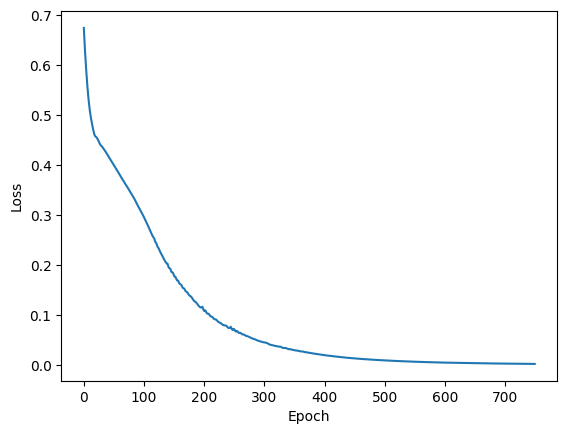

In [ ]:
#plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs),fi_los)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
#Evaluate the model on training data set

predictions = []
with torch.no_grad():
    for i,data in enumerate(X_train):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())


In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix
accuracy = accuracy_score(y_train,predictions)
cm=confusion_matrix(y_train,predictions)

print('Confusion Matrix: \n', cm)
print()
print('Accurracy: ',accuracy)

Confusion Matrix: 
 [[398   0]
 [  0 215]]

Accurracy:  1.0


In [ ]:
#Evaluationg Testing Accuracy of data set
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix
accuracy = accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

print('Confusion Matrix: \n', cm)
print()
print('Accurracy: ',accuracy)

Confusion Matrix: 
 [[86 16]
 [24 28]]

Accurracy:  0.7402597402597403


In [ ]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.4 MB/s eta 0:00:00


In [ ]:
#fetaure selection
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Initialize a random forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)



In [ ]:
type(X_train)

torch.Tensor

In [ ]:
type(y_train)

torch.Tensor

In [ ]:
# Create a Boruta feature selector object
boruta_feature_selector = BorutaPy(estimator=rf, n_estimators='auto', max_iter=100, random_state=42)


# Fit the Boruta feature selector to the data
boruta_feature_selector.fit(X_train, y_train)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=69, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FD9089B9D40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FD9089B9D40)

In [ ]:
boruta_feature_selector.support_

array([ True,  True, False, False, False,  True,  True,  True])

In [ ]:
print("No. of significant features: ", boruta_feature_selector.n_features_)

No. of significant features:  5


In [ ]:
type(X_test)

torch.Tensor

In [ ]:
# Transform the data to include only the selected features
X_train_selected = boruta_feature_selector.transform(X_train)
X_test_selected = boruta_feature_selector.transform(X_test)



In [ ]:
print(X_train_selected.shape)
print(X_test_selected.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([613, 5])
torch.Size([154, 5])
torch.Size([613])
torch.Size([154])


In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_selected, y_train = smt.fit_resample(X_train_selected, y_train)
X_test_selected, y_test = smt.fit_resample(X_test_selected, y_test)

In [ ]:
#Random forest


from sklearn.ensemble import RandomForestClassifier
import datetime

RFC1 = RandomForestClassifier(max_depth=6)
RFC1.fit(X_train_selected,y_train)

start = datetime.datetime.now()
end = datetime.datetime.now()
print("Total execution time: ", end-start)

y_rfc_train_pred = RFC1.predict(X_train_selected)
y_rfc_test_pred = RFC1.predict(X_test_selected)



print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,y_rfc_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,y_rfc_train_pred))
print("Classification report: \n",classification_report(y_train,y_rfc_train_pred,digits=4))

print(" ACCURACY FROM TESTING DATASET :")
print("Accuracy score: ",accuracy_score(y_test,y_rfc_test_pred)*100)
print("Confusion matrix: \n",confusion_matrix(y_test,y_rfc_test_pred))
print("Classification report: \n",classification_report(y_test,y_rfc_test_pred,digits=4))

Total execution time:  0:00:00.000060
ACCURACY FROM TRAINING DATASET :
Accuracy score:  88.19
Confusion matrix: 
 [[331  67]
 [ 27 371]]
Classification report: 
               precision    recall  f1-score   support

           0     0.9246    0.8317    0.8757       398
           1     0.8470    0.9322    0.8876       398

    accuracy                         0.8819       796
   macro avg     0.8858    0.8819    0.8816       796
weighted avg     0.8858    0.8819    0.8816       796

 ACCURACY FROM TESTING DATASET :
Accuracy score:  80.3921568627451
Confusion matrix: 
 [[83 19]
 [21 81]]
Classification report: 
               precision    recall  f1-score   support

           0     0.7981    0.8137    0.8058       102
           1     0.8100    0.7941    0.8020       102

    accuracy                         0.8039       204
   macro avg     0.8040    0.8039    0.8039       204
weighted avg     0.8040    0.8039    0.8039       204



In [ ]:
#NAIVE BAYES

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create Naive Bayes classifier object and train on the training data
nb_clf = GaussianNB()
nb_clf.fit(X_train_selected, y_train)

# Use the trained models to predict on the testing data
nb_train_pred = nb_clf.predict(X_train_selected)
nb_y_pred = nb_clf.predict(X_test_selected)

print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,nb_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,nb_train_pred))
print("Classification report: \n",classification_report(y_train,nb_train_pred,digits=4))


print("ACCURACY FROM Test DATASET :")
print("Accuracy score: ",round(accuracy_score(y_test,nb_y_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_test,nb_y_pred))
print("Classification report: \n",classification_report(y_test,nb_y_pred,digits=4))




ACCURACY FROM TRAINING DATASET :
Accuracy score:  73.37
Confusion matrix: 
 [[303  95]
 [117 281]]
Classification report: 
               precision    recall  f1-score   support

           0     0.7214    0.7613    0.7408       398
           1     0.7473    0.7060    0.7261       398

    accuracy                         0.7337       796
   macro avg     0.7344    0.7337    0.7335       796
weighted avg     0.7344    0.7337    0.7335       796

ACCURACY FROM Test DATASET :
Accuracy score:  77.45
Confusion matrix: 
 [[85 17]
 [29 73]]
Classification report: 
               precision    recall  f1-score   support

           0     0.7456    0.8333    0.7870       102
           1     0.8111    0.7157    0.7604       102

    accuracy                         0.7745       204
   macro avg     0.7784    0.7745    0.7737       204
weighted avg     0.7784    0.7745    0.7737       204



In [ ]:
inputs = [1,85,66,29,0,26.6,0.351,31]
user_input_df = data.drop(columns=['Outcome'])
user_input = pd.DataFrame(inputs, index=user_input_df.columns).T
user_input

AttributeError: ignored

In [ ]:
user_input_df = user_input_df.append(user_input, ignore_index=True)
user_input_df

NameError: ignored

In [ ]:
user_input1 = user_input_df.iloc[user_input_df.shape[0]-1, :]
user_input1 = pd.DataFrame(user_input1).T
user_input1.values.reshape(-1,1)
user_input1


NameError: ignored

In [ ]:
outcome = [0,1]
print('outcome for this patient is : {:.0f} '.format(nb.predict(user_input1)[0]))


NameError: ignored

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr

In [ ]:
def input(Pregnancies,Glucose,BlodPresuure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):
  inputs = [Pregnancies,Glucose,BlodPresuure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]
  user_input_df = data.drop(columns=['Outcome'])
  user_input = pd.DataFrame(inputs, index=user_input_df.columns).T

  user_input_df = user_input_df.append(user_input, ignore_index=True)

  user_input1 = user_input_df.iloc[user_input_df.shape[0]-1, :]
  user_input1 = pd.DataFrame(user_input1).T
  user_input1.values.reshape(-1,1)

 # outcome = [0,1]
  result = 'outcome for this patient is : {:.0f} '.format(RFC.predict(user_input1)[0])
  return result
  

In [ ]:
demo = gr.Interface(fn=input,
                    inputs=["number","number","number","number","number","number","number","number"],
                    outputs=['text'],
                    theme='huggingface',
                    css = """
                    body {background-color : grey}
                    """
                    )

demo.launch() 

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Importing Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
X_train = torch.FloatTensor(X_train_selected)
X_test = torch.FloatTensor(X_test_selected)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#Creating our model
class ANN_Model(nn.Module):
    def __init__( self,input_features=5,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.f_output = nn.Linear(hidden2,out_features)
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.f_output(x)
        return x  

In [ ]:
#instantiate ANN model
torch.manual_seed(20)
model = ANN_Model()
model.parameters

In [ ]:
#Backpropogation : Define Loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epochs = 750
final_losses = []
for i in range(epochs):
    i = i+1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("For epoch {} loss is {} ".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    fi_los = [fl.item() for fl in final_losses ]

For epoch 1 loss is 0.7090631127357483 
For epoch 11 loss is 0.5597948431968689 
For epoch 21 loss is 0.505632758140564 
For epoch 31 loss is 0.4816390872001648 
For epoch 41 loss is 0.46691301465034485 
For epoch 51 loss is 0.45147332549095154 
For epoch 61 loss is 0.4347722828388214 
For epoch 71 loss is 0.4168252646923065 
For epoch 81 loss is 0.39595165848731995 
For epoch 91 loss is 0.36963778734207153 
For epoch 101 loss is 0.34953320026397705 
For epoch 111 loss is 0.33102938532829285 
For epoch 121 loss is 0.31584432721138 
For epoch 131 loss is 0.30321255326271057 
For epoch 141 loss is 0.2959035038948059 
For epoch 151 loss is 0.2839862108230591 
For epoch 161 loss is 0.2781129479408264 
For epoch 171 loss is 0.27119341492652893 
For epoch 181 loss is 0.2648644745349884 
For epoch 191 loss is 0.2637282609939575 
For epoch 201 loss is 0.2554570734500885 
For epoch 211 loss is 0.24988099932670593 
For epoch 221 loss is 0.2454066425561905 
For epoch 231 loss is 0.242961093783378

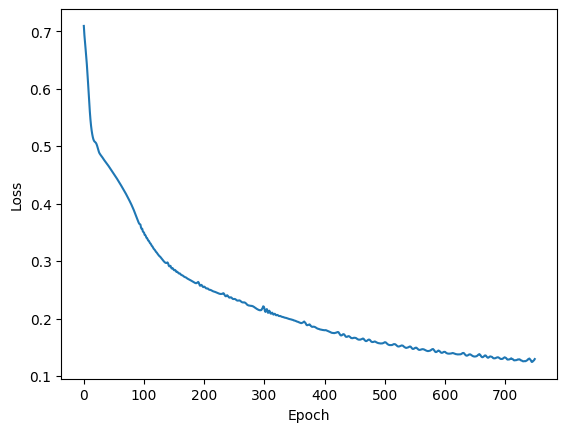

In [ ]:
#plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs),fi_los)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
#Evaluate the model on training data set

prediction = []
with torch.no_grad():
    for i,data in enumerate(X_train):
        y_pred = model(data)
        prediction.append(y_pred.argmax().item())


In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix
accuracy = accuracy_score(y_train,prediction)
cm=confusion_matrix(y_train,prediction)

print('Confusion Matrix: \n', cm)
print()
print('Accurracy: ',accuracy)

In [ ]:
#Evaluationg Testing Accuracy of data set
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix
accuracy = accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

print('Confusion Matrix: \n', cm)
print()
print('Accurracy: ',accuracy)

In [ ]:
#pickle.dump(model,open('model.pkl','wb'))